# Text Classification Challenge

## Overview

Welcome to the Text Classification Challenge! In this task, you will develop a machine learning model to classify IMDb movie reviews into positive or negative sentiments. The challenge is designed to help you demonstrate your skills in natural language processing (NLP) and your ability to work with state-of-the-art transformer models.

### Problem Statement

The task is to build a text classification model that accurately predicts whether a given movie review expresses a positive or negative sentiment. Sentiment analysis is a critical task in NLP with applications in marketing, customer feedback, social media monitoring, and more. Accurately classifying sentiments can provide valuable insights into customer opinions and help businesses make data-driven decisions.

### Why This Task is Important

Understanding customer sentiment through text data is crucial for businesses and organizations to respond effectively to customer needs and preferences. By automating the sentiment analysis process, companies can efficiently analyze vast amounts of data, identify trends, and make informed strategic decisions. For this challenge, we will use the IMDb dataset, a widely-used benchmark in sentiment analysis, to train and evaluate our model.

## Dataset Description

The dataset used for this challenge is the IMDb movie reviews dataset, which contains 50,000 reviews labeled as either positive or negative. This dataset is balanced, with an equal number of positive and negative reviews, making it ideal for training and evaluating sentiment analysis models.

- **Columns:**
  - `review`: The text of the movie review.
  - `sentiment`: The sentiment label (`positive` or `negative`).

The IMDb dataset provides a real-world scenario where understanding sentiment can offer insights into public opinion about movies, directors, and actors, as well as broader trends in the entertainment industry.

## Approach

Transformers have revolutionized NLP by allowing models to consider the context of a word based on surrounding words, enabling better understanding and performance on various tasks, including sentiment analysis. Their ability to transfer learning from massive datasets and adapt to specific tasks makes them highly effective for text classification.

## Your Task

You are required to implement a transformer-based model for sentiment classification on the IMDb dataset. Follow the steps below to complete the challenge:

1. **Data Exploration and Preprocessing:**
   - Load the dataset and perform exploratory data analysis (EDA) to understand its structure.
   - Preprocess the data by cleaning text, encoding labels, and splitting into training and test sets.

2. **Model Implementation:**
   - Implement a transformer-based model for sentiment classification. You should consider writing Transformer blocks from scratch.
   - Implement data loaders and training loops using a deep learning framework like PyTorch or TensorFlow.

3. **Training and Evaluation:**
   - Train your model and optimize hyperparameters for the best performance.
   - Evaluate the model using appropriate metrics.

4. **Documentation:**
   - Document your approach, experiments, and results.
   - Discuss any challenges faced and propose potential improvements.

5. **Prediction and Inference:**
    - Implement a function that takes a movie review as input and predicts the sentiment (positive or negative).
    - Test the function with custom reviews and display the predicted sentiment.

6. **Model Deployment:**
    - Save the trained model and any other necessary files.
    - Prepare the model for deployment (e.g., using Flask or FastAPI).
    - Prepare a basic front-end interface for the deployed model.

7. **Submission:**
    - Create a GitHub repository for your code.
    - Write a detailed README.md file with instructions on how to train, evaluate, and use the model.
    - Include a summary of your approach and the results in the README file.
    - Your code should be well-documented and reproducible.
    - Your repository should include a notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
    - Apart from the notebook, you should also have all the codes in .py files so that it can be easily integrated with the API.
    - You submission should also include a python script for the API.
    - Your submission should also include a basic front-end for the deployed model.
    - Submit the GitHub repository link.

## Getting Started

To get started, follow the structure provided in this notebook, complete each step, and explore additional techniques to enhance your model's performance. Make sure to document your findings and prepare a comprehensive report on your work.

Good luck, and welcome to RealAI!


# Data Exploration and Preprocessing

Let's start by loading the dataset and performing some exploratory data analysis (EDA) to understand its structure and characteristics.
You can download the dataset from the following link: https://drive.google.com/file/d/1aU7Vv7jgodZ0YFOLY7kmSjrPcDDwtRfU/view?usp=sharing

You should provide all the necessary reasoning and code to support your findings.

Finally, you should apply the required preprocessing steps to prepare the data for training the sentiment classification model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup #Remove HTML tags
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [20]:
file_path = '/content/drive/MyDrive/labProject/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


Text(0.5, 1.0, 'Distribution of Reviews')

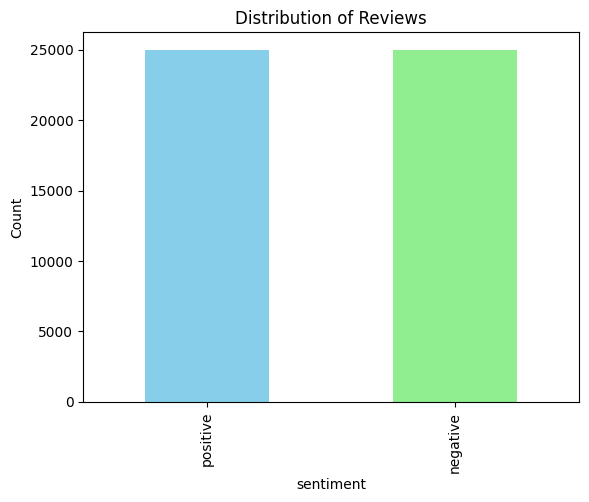

In [ ]:
colors=['skyblue','lightgreen']
df['sentiment'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Distribution of Reviews')

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


==> Both class has an equal number of data

In [ ]:
df_copy=df.copy()

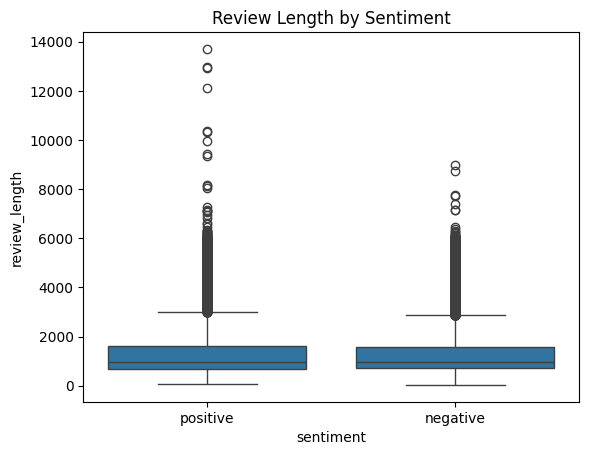

In [ ]:
df_copy['review_length'] = df_copy['review'].str.len()
sns.boxplot(x='sentiment', y='review_length', data=df_copy)
plt.title('Review Length by Sentiment')
plt.show()


In [ ]:
df_copy

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


# **Data preprocessing**
# **Data Cleaning**



*   Remove html tags
*   Converting all text to lowercase.
*   Remove special_characters
*   Remove multiple space
*   Remove stop words





In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def convert_to_lowercase(text):
    return text.lower()

def remove_stop_words(text):
    stop_words=set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words and len(word) > 1])

def reduce_multiple_spaces(text):
    return ' '.join(text.split())

def preprocess_review(text):
    text = remove_html_tags(text)
    text = remove_special_characters(text)
    text = convert_to_lowercase(text)
    text= remove_stop_words(text)
    text=reduce_multiple_spaces(text)
    return text

In [23]:
df['review'] = df['review'].apply(preprocess_review)


<ipython-input-22-54cd1bb65260>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


Cleaned data

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# **Label Encoding**

In [24]:
df['sentiment']=df['sentiment'].replace({'positive':1, 'negative':0})
df

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


# **Split Data**

In [25]:
X= df['review'].values #feature
y= df['sentiment'].values #label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(len(X_train))
print(len(X_test))

40000
10000


# Model Implementation

You are required to implement a transformer-based model for sentiment classification from scratch. You can use libraries like PyTorch or TensorFlow to implement the model architecture and training process.

You should include the architecture figure of the proposed model and provide a detailed explanation of why you chose this architecture.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from collections import defaultdict
from bs4 import BeautifulSoup

In [27]:
class Tokenizer:
    def __init__(self, max_len=128):
        self.max_len = max_len
        self.word_to_idx = {}
        self.idx_to_word = {}
        self.vocab_size = 0

    def fit_on_texts(self, texts):
        vocab = set()
        for text in texts:
            vocab.update(text.split())
        self.word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}
        self.word_to_idx['<PAD>'] = 0
        self.idx_to_word = {idx: word for word, idx in self.word_to_idx.items()}
        self.vocab_size = len(self.word_to_idx)

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            encoded = [self.word_to_idx.get(word, 0) for word in text.split()]
            if len(encoded) < self.max_len:
                encoded.extend([0] * (self.max_len - len(encoded)))
            else:
                encoded = encoded[:self.max_len]
            sequences.append(encoded)
        return np.array(sequences)

In [28]:
# Initialize tokenizer
tokenizer = Tokenizer(max_len=128)


In [29]:
tokenizer.fit_on_texts(X_train)

In [30]:
# Convert the text reviews to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [31]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [14]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.depth = d_model // num_heads

        self.query = nn.Linear(d_model, d_model)
        self.key = nn.Linear(d_model, d_model)
        self.value = nn.Linear(d_model, d_model)
        self.fc_out = nn.Linear(d_model, d_model)

    def forward(self, query, key, value, mask=None):
        batch_size = query.shape[0]

        query = self.query(query)
        key = self.key(key)
        value = self.value(value)

        query = query.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        key = key.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        value = value.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)

        attention_scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.depth, dtype=torch.float32))
        if mask is not None:
            attention_scores = attention_scores.masked_fill(mask == 0, float('-inf'))
        attention_weights = torch.nn.functional.softmax(attention_scores, dim=-1)

        attention_output = torch.matmul(attention_weights, value)

        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        output = self.fc_out(attention_output)
        return output

In [15]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.ReLU(),
            nn.Linear(d_model * 4, d_model)
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        attention_output = self.attention(x, x, x, mask)
        x = self.norm1(attention_output + x)
        x = self.dropout(x)  # Apply dropout here
        feed_forward_output = self.feed_forward(x)
        x = self.norm2(feed_forward_output + x)
        x = self.dropout(x)  # Apply dropout here
        return x


In [16]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

In [17]:
class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, num_layers, num_classes, max_len, dropout=0.1):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_len)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(d_model, num_heads, dropout) for _ in range(num_layers)]
        )
        self.fc_out = nn.Linear(d_model, num_classes)

    def forward(self, x, mask=None):
        x = self.embedding(x) * np.sqrt(self.embedding.embedding_dim)
        x = self.positional_encoding(x)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, mask)
        x = x.mean(dim=1)
        x = self.fc_out(x)
        return x

In [32]:
vocab_size = tokenizer.vocab_size
d_model = 128
num_heads = 8
num_layers = 4
num_classes = 2
dropout = 0.1



In [33]:

model = SentimentClassifier(vocab_size, d_model, num_heads, num_layers, num_classes, max_len=128, dropout=dropout)
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# Training and Evaluation

Train your sentiment classification model on the preprocessed data. You should experiment with different hyperparameters and training configurations to achieve the best performance.

Evaluate your model using appropriate metrics and provide an analysis of the results.

In [ ]:
def train(model, X_train, y_train, optimizer, criterion, batch_size, scheduler=None):
    model.train()
    train_loss, correct = 0, 0
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        if scheduler:
            scheduler.step()

        train_loss += loss.item()
        correct += (output.argmax(1) == y_batch).sum().item()

    accuracy = correct / len(X_train)
    return train_loss / len(X_train), accuracy


In [ ]:
def evaluate(model, X_test, y_test, criterion, batch_size):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i + batch_size]
            y_batch = y_test[i:i + batch_size]
            output = model(X_batch)
            loss = criterion(output, y_batch)

            test_loss += loss.item()
            correct += (output.argmax(1) == y_batch).sum().item()

    accuracy = correct / len(X_test)
    return test_loss / len(X_test), accuracy

In [ ]:
import numpy as np
'''
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = np.inf
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            return True
        return False
'''
# Initialize early stopping
#early_stopping = EarlyStopping(patience=3, min_delta=0.001)

EPOCHS = 3  # Increase the number of epochs since early stopping will handle the stopping
BATCH_SIZE = 64

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
CHECKPOINT_PATH = '/content/drive/MyDrive/labProject/ch.pth'

for epoch in range(EPOCHS):
    train_loss, train_accuracy = train(model, X_train_tensor, y_train_tensor, optimizer, criterion, BATCH_SIZE)
    val_loss, val_accuracy = evaluate(model, X_test_tensor, y_test_tensor, criterion, BATCH_SIZE)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"test Loss: {val_loss:.4f}, test Accuracy: {val_accuracy:.4f}")

    # Save checkpoint if needed
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'test_loss': val_loss,
        'test_accuracy': val_accuracy,
    }
    torch.save(checkpoint, CHECKPOINT_PATH)
    print(f"Checkpoint saved to {CHECKPOINT_PATH}")

'''  # Check early stopping condition
    if early_stopping(val_loss):
        print("Early stopping triggered")
        break
'''

Epoch 1/3
Train Loss: 0.0077, Train Accuracy: 0.7502
Val Loss: 0.0063, Val Accuracy: 0.8198
Checkpoint saved to /content/drive/MyDrive/labProject/ch.pth
Epoch 2/3
Train Loss: 0.0058, Train Accuracy: 0.8385
Val Loss: 0.0061, Val Accuracy: 0.8367
Checkpoint saved to /content/drive/MyDrive/labProject/ch.pth
Epoch 3/3
Train Loss: 0.0051, Train Accuracy: 0.8600
Val Loss: 0.0061, Val Accuracy: 0.8340
Checkpoint saved to /content/drive/MyDrive/labProject/ch.pth


'  # Check early stopping condition\n    if early_stopping(val_loss):\n        print("Early stopping triggered")\n        break\n'

Display evaluation values

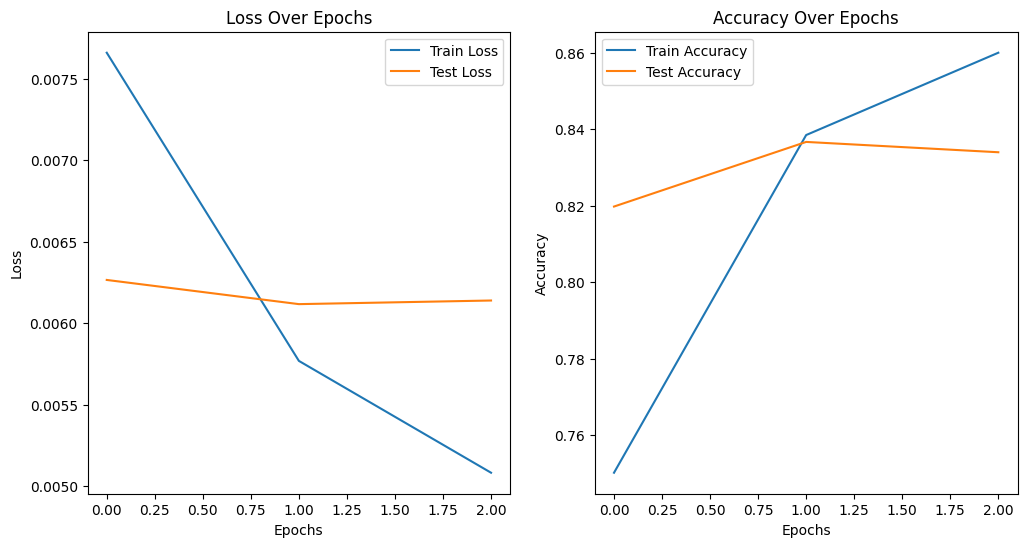

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), train_losses, label='Train Loss')
plt.plot(range(EPOCHS), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), train_accuracies, label='Train Accuracy')
plt.plot(range(EPOCHS), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

Save the model after training

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/labProject/transformer1/model2.pth'
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Model saved to /content/drive/MyDrive/labProject/transformer1/model2.pth


Load the model to test it

In [34]:
import torch

model = SentimentClassifier(vocab_size, d_model, num_heads, num_layers, num_classes, max_len=128, dropout=dropout)

# Load the saved model state_dict
MODEL_PATH = '/content/drive/MyDrive/labProject/transformer1/model2.pth'
model.load_state_dict(torch.load(MODEL_PATH))

# Set the model to evaluation mode
model.eval()


<ipython-input-34-32a7b382f494>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


SentimentClassifier(
  (embedding): Embedding(186200, 128)
  (positional_encoding): PositionalEncoding()
  (transformer_blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (attention): MultiHeadAttention(
        (query): Linear(in_features=128, out_features=128, bias=True)
        (key): Linear(in_features=128, out_features=128, bias=True)
        (value): Linear(in_features=128, out_features=128, bias=True)
        (fc_out): Linear(in_features=128, out_features=128, bias=True)
      )
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (feed_forward): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=128, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (fc_out): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
#Load checkpoint in case we interrupt the training
'''
# Load checkpoint
def load_checkpoint(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    epoch = checkpoint['epoch']
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    train_loss = checkpoint['train_loss']
    train_accuracy = checkpoint['train_accuracy']
    test_loss = checkpoint['test_loss']
    test_accuracy = checkpoint['test_accuracy']
    return epoch, train_loss, train_accuracy, test_loss, test_accuracy

# Initialize model and optimizer
model =  SentimentClassifier(vocab_size, d_model, num_heads, num_layers, num_classes, max_len=128, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters())  # Replace with your optimizer initialization

# Load checkpoint if available
try:
    epoch, train_loss, train_accuracy, test_loss, test_accuracy = load_checkpoint(CHECKPOINT_PATH)
    print(f"Resuming training from epoch {epoch}")
except FileNotFoundError:
    print("No checkpoint found. Starting training from scratch.")
    epoch = 0

# Adjust EPOCHS if resuming
EPOCHS = 5
'''

Display model architecture

In [ ]:
!pip install torchinfo


In [ ]:
from torchinfo import summary

# Example input to match your model's input size and type
example_input = torch.zeros((1, 128), dtype=torch.long)

# Display the model summary
summary(model, input_data=example_input)


Layer (type:depth-idx)                   Output Shape              Param #
SentimentClassifier                      [1, 2]                    --
├─Embedding: 1-1                         [1, 128, 128]             23,833,600
├─PositionalEncoding: 1-2                [1, 128, 128]             --
├─ModuleList: 1-3                        --                        --
│    └─TransformerBlock: 2-1             [1, 128, 128]             --
│    │    └─MultiHeadAttention: 3-1      [1, 128, 128]             66,048
│    │    └─LayerNorm: 3-2               [1, 128, 128]             256
│    │    └─Dropout: 3-3                 [1, 128, 128]             --
│    │    └─Sequential: 3-4              [1, 128, 128]             131,712
│    │    └─LayerNorm: 3-5               [1, 128, 128]             256
│    │    └─Dropout: 3-6                 [1, 128, 128]             --
│    └─TransformerBlock: 2-2             [1, 128, 128]             --
│    │    └─MultiHeadAttention: 3-7      [1, 128, 128]            

# Prediction and Inference

Implement a function that takes a movie review as input and predicts the sentiment (positive or negative). Test the function with custom reviews and display the predicted sentiment.

In [ ]:
import torch
#test function
def predict_sentiment(review, model, tokenizer, device='cpu'):

    # Preprocess and tokenize the review
    review_processed = preprocess_review(review)
    review_seq = tokenizer.texts_to_sequences([review_processed])
    review_tensor = torch.tensor(review_seq, dtype=torch.long).to(device)

    # Ensure model is in evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        output = model(review_tensor)

    # Get the predicted class
    _, predicted = torch.max(output, 1)

    # Map to sentiment label
    sentiment = 'positive' if predicted.item() == 1 else 'negative'

    return sentiment


In [ ]:
# Example custom reviews
reviews = [
    "I absolutely loved this movie! it's amazing.",
    #"The story was boring! this movie was a waste of time.",

    "I didn't like the film, it was boring"
]

# Predict sentiment for each review
for review in reviews:
    sentiment = predict_sentiment(review, model, tokenizer, device='cpu')
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")


Review: I absolutely loved this movie! it's amazing.
Predicted Sentiment: positive

Review: I didn't like the film, it was boring
Predicted Sentiment: negative



## Model Deployment

Save the trained model and any other necessary files. Prepare the model for deployment using Flask or FastAPI. Make a python script for the API. Also, include a basic front-end for the API.

**I will use fastapi, so we have to install it and uvicorn**


In [3]:
!pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.7 MB/s eta 0:00:00


In [4]:
!pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00


**Also we need to install pyngrok to running a local server in colab via a public URL**




In [5]:
!pip install pyngrok


In [6]:
from pyngrok import ngrok

# create ngrok account and got the token
ngrok.set_auth_token("keyy")

# choose a tunnel on port 8000
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://ba57-34-148-224-77.ngrok-free.app" -> "http://localhost:8000"


In [37]:
from fastapi import FastAPI
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import torch
import uvicorn
import nest_asyncio
from pyngrok import ngrok

# Apply nest_asyncio to avoid the event loop conflict
nest_asyncio.apply()

# Initialize the FastAPI app
app = FastAPI()

# Define a request model for the input text
class TextData(BaseModel):
    text: str

# Load your trained model (assuming you have already defined SentimentClassifier)
model = SentimentClassifier(vocab_size, d_model, num_heads, num_layers, num_classes, max_len=128, dropout=dropout)
MODEL_PATH = '/content/drive/MyDrive/labProject/transformer1/model2.pth'
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# Define a function to preprocess the input text
def preprocess_input(text):
    text = preprocess_review(text)  # Assuming preprocess_review is available
    sequence = tokenizer.texts_to_sequences([text])
    tensor = torch.tensor(sequence, dtype=torch.long)
    return tensor

# Define a prediction endpoint
@app.post("/predict/")
async def predict_sentiment(data: TextData):
    text = data.text
    input_tensor = preprocess_input(text)
    with torch.no_grad():
        prediction = model(input_tensor)
        predicted_class = torch.argmax(prediction, dim=1).item()
    sentiment = 'positive' if predicted_class == 1 else 'negative'
    return {"sentiment": sentiment}

# Define an index route to serve the HTML content
@app.get("/", response_class=HTMLResponse)
async def index():
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Hadil's Sentiment Analysis Application</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f0f8ff; /* Light sky blue background color */
                color: #333;
                margin: 0;
                padding: 0;
                text-align: center;
            }
            h1 {
                color: #4682b4; /* Steel blue color for the title */
            }
            textarea {
                width: 300px;
                height: 150px;
                padding: 10px;
                margin: 10px 0;
            }
            button {
                padding: 10px 20px;
                font-size: 16px;
                background-color: #4682b4; /* Steel blue color for the button */
                color: white;
                border: none;
                border-radius: 5px;
                cursor: pointer;
            }
            button:hover {
                background-color: #4169e1; /* Royal blue color on hover */
            }
        </style>
    </head>
    <body>
        <h1>Welcome to Hadil's Sentiment Analysis Application</h1>
        <form id="sentiment-form">
            <textarea id="text" placeholder="Enter text for sentiment analysis"></textarea><br><br>
            <button type="submit">Analyze Sentiment</button>
        </form>
        <h2 id="result"></h2>
        <script>
            document.getElementById('sentiment-form').addEventListener('submit', async function(event) {
                event.preventDefault();
                const text = document.getElementById('text').value;
                const response = await fetch('/predict/', {
                    method: 'POST',
                    headers: {'Content-Type': 'application/json'},
                    body: JSON.stringify({text: text})
                });
                const result = await response.json();
                document.getElementById('result').textContent = 'Sentiment: ' + result.sentiment;
            });
        </script>
    </body>
    </html>
    """
    return html_content



# Start ngrok tunnel to expose the FastAPI server
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Start the FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8000)


<ipython-input-37-a3915c372131>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


Public URL: NgrokTunnel: "https://352f-34-148-224-77.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [587]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     196.176.74.45:0 - "GET / HTTP/1.1" 200 OK
INFO:     196.176.74.45:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     196.176.74.45:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     196.176.74.45:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     196.176.74.45:0 - "POST /predict/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [587]
